<h1>Question: What are the top trails based on trail length?</h1>

Disclaimer: We are measuring "top" trails as the most popular according to number of reviewers and overall rating.

In [7]:
%matplotlib notebook

In [8]:
# Dependencies
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
trails_dropped = pd.read_csv('trails_dropped.csv')
trails_dropped = pd.DataFrame(trails_dropped)
trails_dropped.head()

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote
0,0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,NaN,1970-01-01 00:00:00,7.0
1,1,7089186,Nature Loop,Hike,A common loop that explores the park.,Easy/Intermediate,5.0,1,"Carmichael, California",1.6,21,-20,77,69,-121.3127,38.6168,Unknown,NaN,1970-01-01 00:00:00,5.0
2,2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,NaN,1970-01-01 00:00:00,36.0
3,3,7016942,Lake Natoma Loop,Hike,Hike around Lake Natoma on bike paths with an ...,Easy/Intermediate,4.2,9,"Folsom, California",12.0,293,-294,194,110,-121.1804,38.6766,Unknown,NaN,1970-01-01 00:00:00,37.8
4,4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,NaN,1970-01-01 00:00:00,6.0


<h2>Step 1: What does this data look like?</h2>
Creating plots with all variables needed to answer question.

<IPython.core.display.Javascript object>


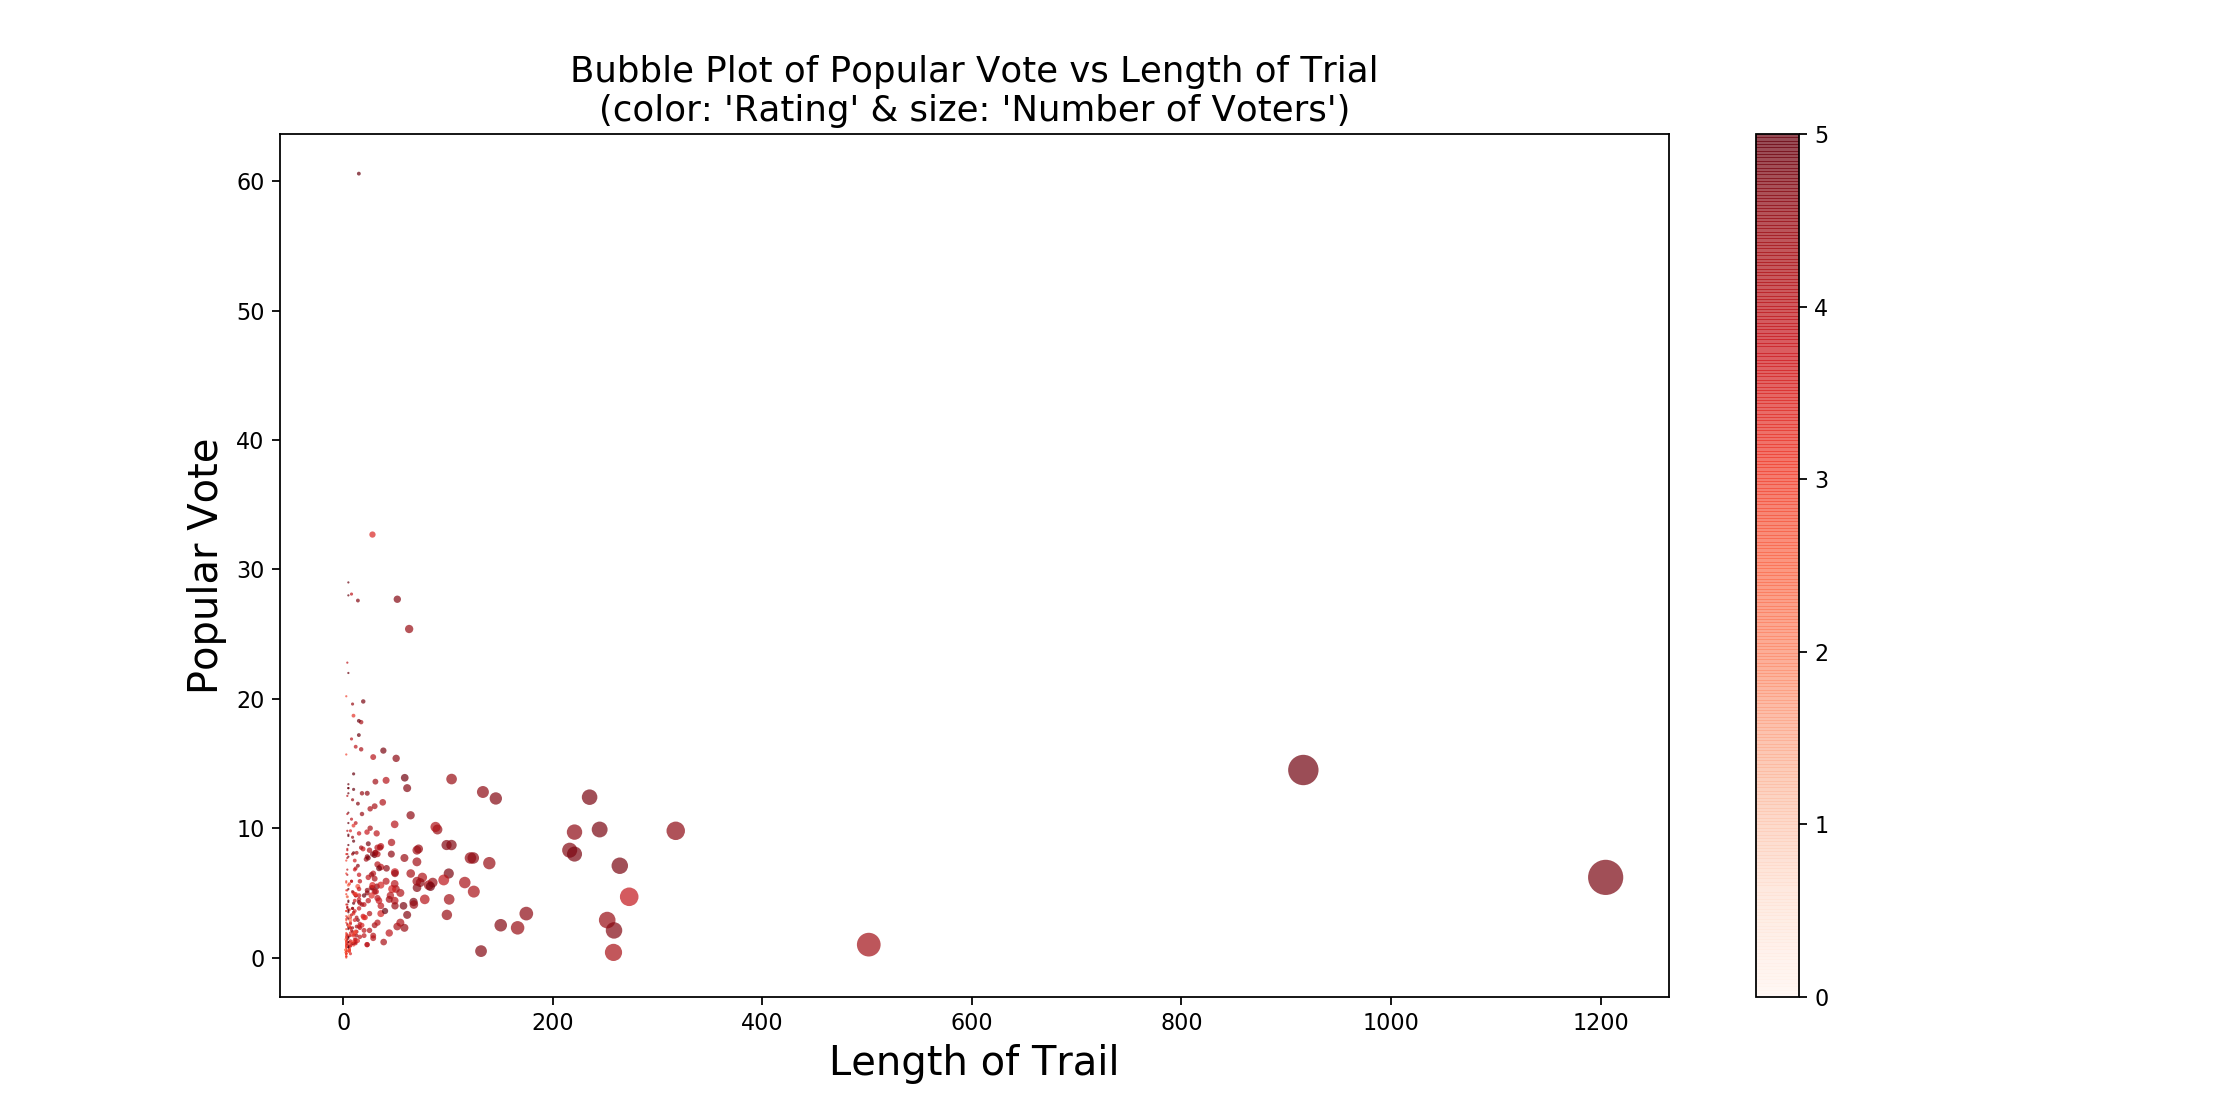

In [12]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('popular_vote', 'length', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
plt.show()  

>Let's fact check this result.
>
>Starting with identifying the outliers....would need to know the name of those trails.

<IPython.core.display.Javascript object>


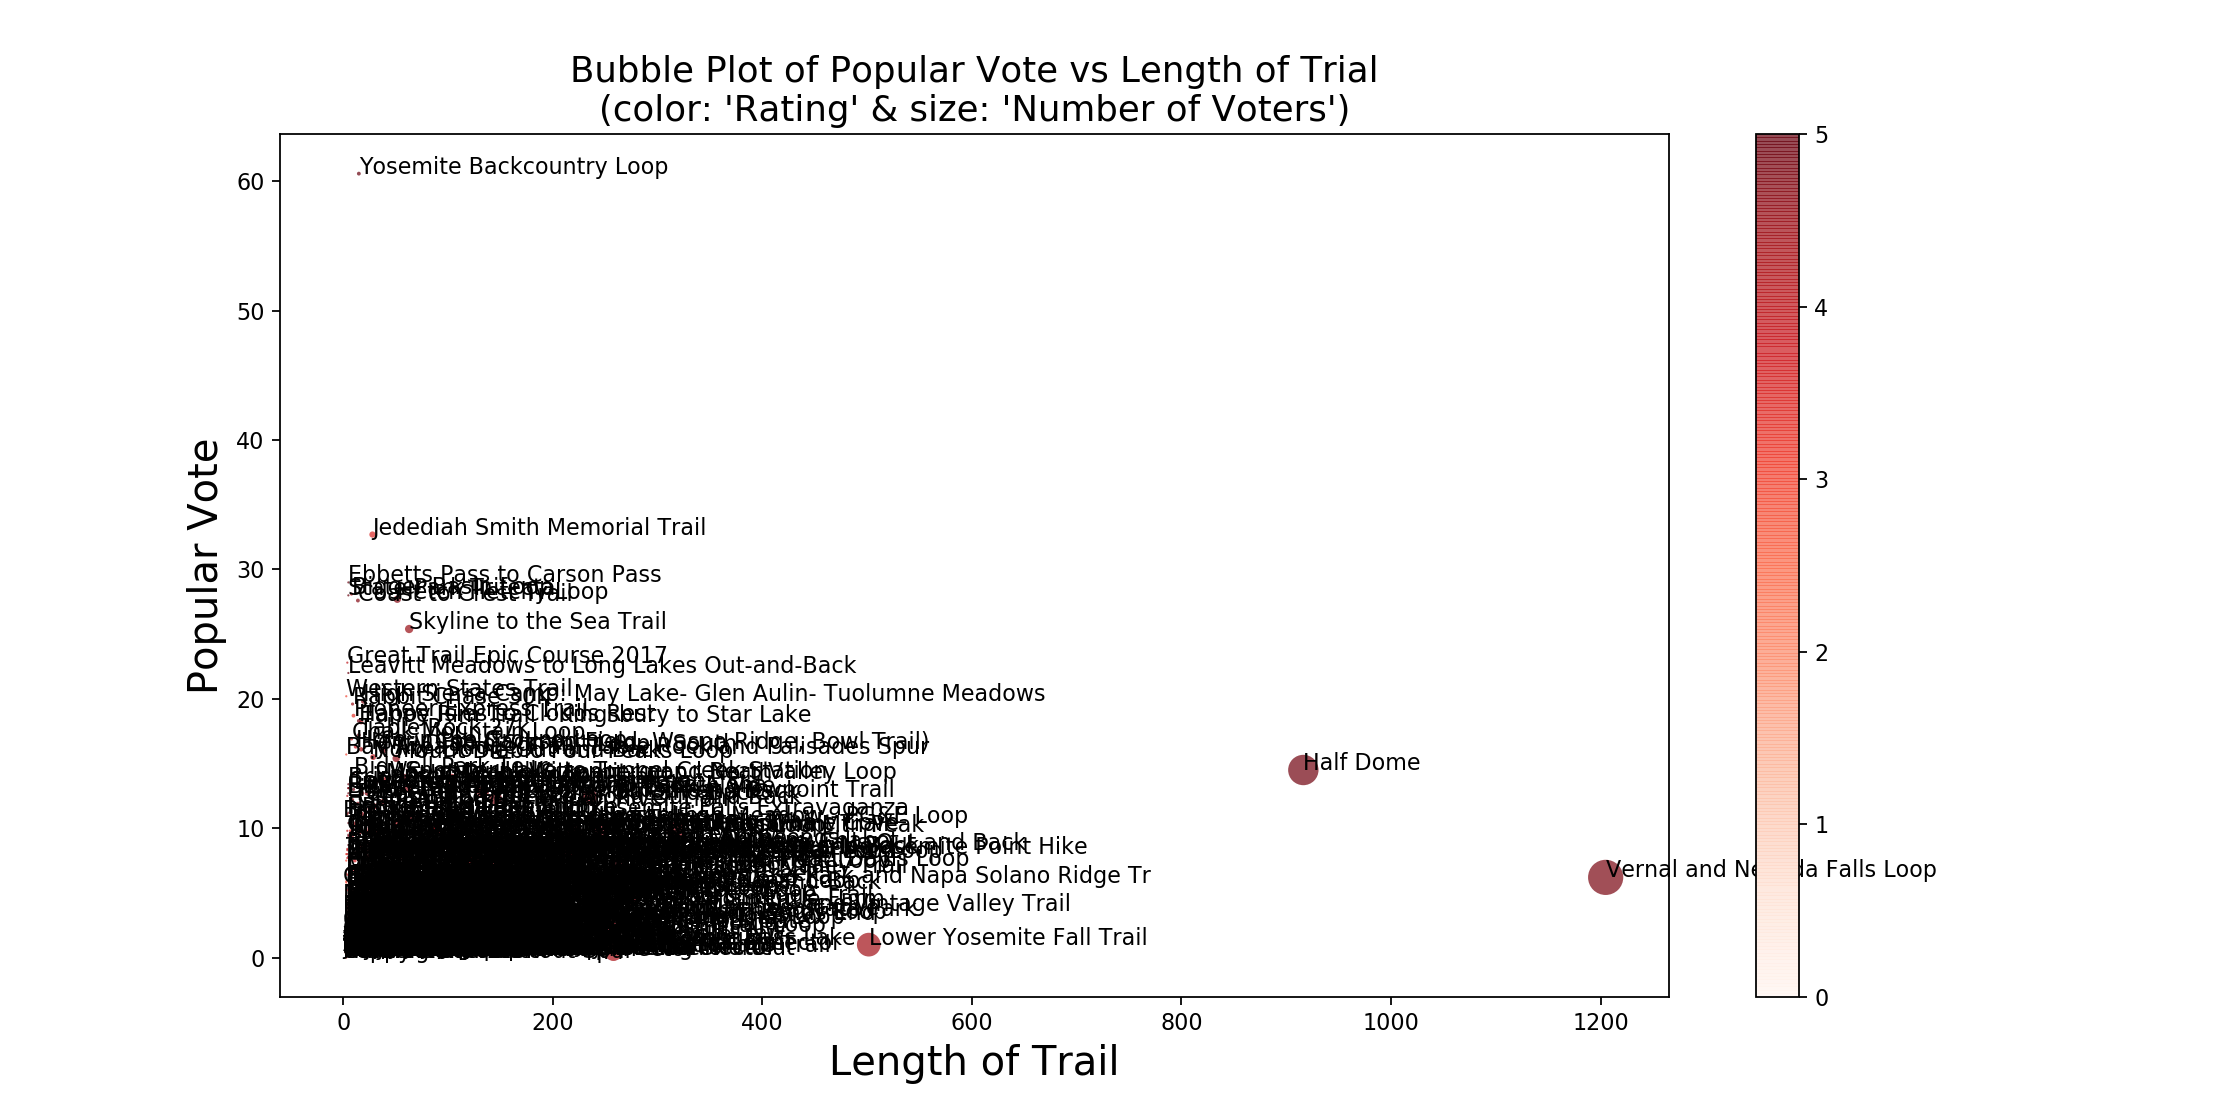

In [13]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('popular_vote', 'length', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
for i,text in enumerate(trails_dropped.name):
    plt.annotate(text, xy=(trails_dropped.popular_vote[i], trails_dropped.length[i]))
plt.show()     

>Messy plot but does the trick! Now we have the names of a couple outliers.
>
>Next, let's run a quick query table to make sure the plot makes sense...

In [15]:
trails_indexed = trails_dropped.set_index('name')
trails_indexed.loc[['Yosemite Backcountry Loop','Half Dome']]

,Unnamed: 0,id,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,popular_vote
name,,,,,,,,,,,,,,,,,,,
Yosemite Backcountry Loop,238,7012515,Hike,An epic jaunt through the remote northern reac...,Difficult,5.0,3,"Yosemite Valley, California",60.6,10264,-10264,10100,4368,-119.3344,37.8776,Unknown,NaN,1970-01-01 00:00:00,15.0
Half Dome,235,7005207,Hike,THE premier route in Yosemite. Hike to the top...,Difficult,4.9,187,"Yosemite Valley, California",14.5,4457,-4457,8476,4083,-119.5583,37.7325,All Clear,NaN,2019-11-17 23:03:06,916.3


>Uh oh. Looks like the x and y axis values are reversed!
>
>Let's fix that...plot figure take #2!

<IPython.core.display.Javascript object>


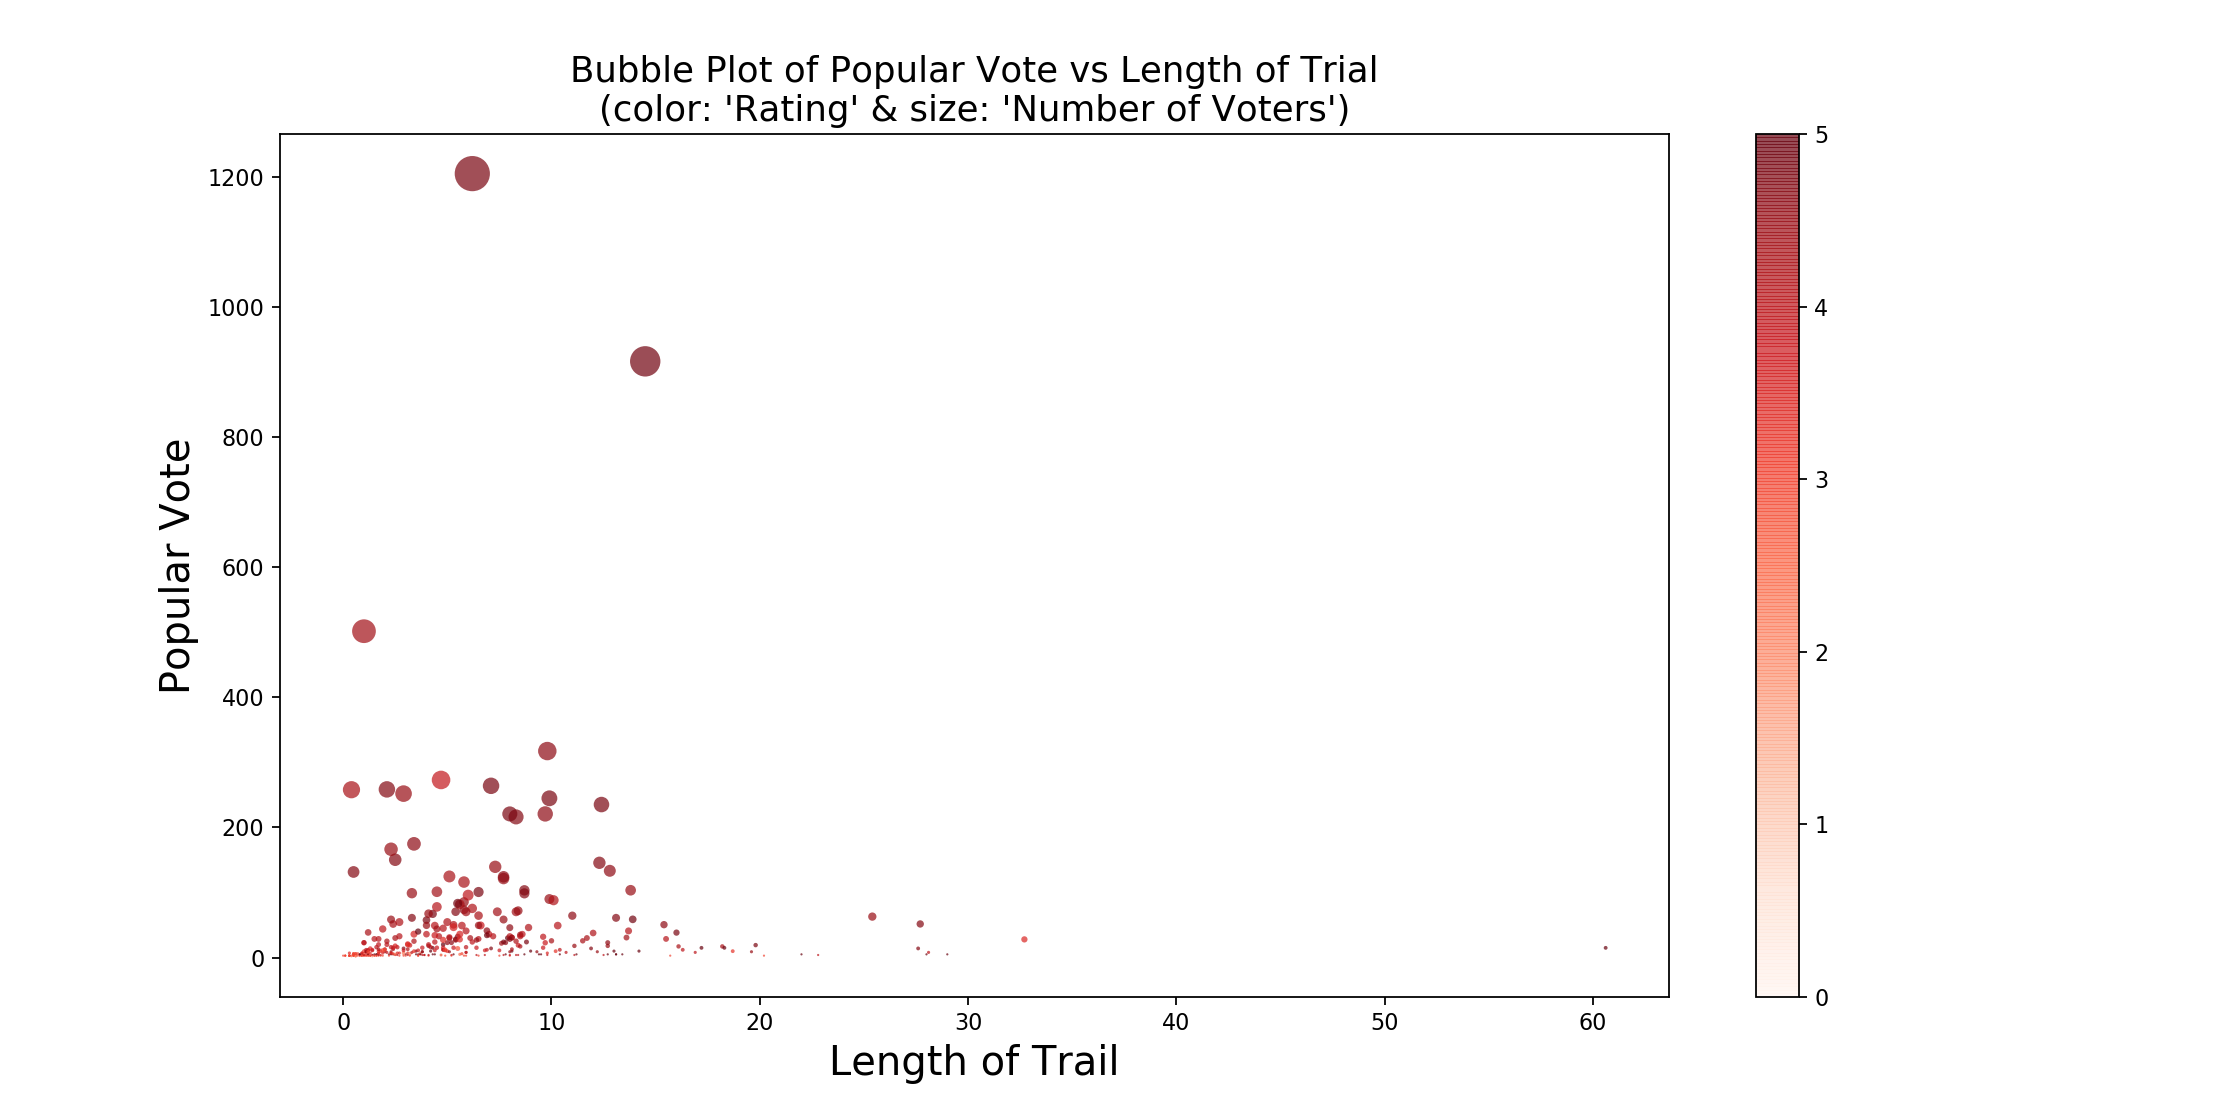

In [16]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('length', 'popular_vote', data=trails_dropped, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length of Trial\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Length of Trail', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
plt.show()

>Much better! This plot makes it easy to see the top 3 most popular trails.
>#savefig

In [18]:
plt.savefig('BubblePlot_Length.png')

<h2>Step 2: Clean up the dataset more specifically to answer this question</h2>
To find out what are the top trails based on length, we need to make categories(bins) for varying trail lengths.

>New dataframe with only relevant columns and sorted by length of trail.

In [21]:
length_bins = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins = length_bins.sort_values(by=['length'])
length_bins.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
467,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496
316,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593
285,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494
429,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443
310,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667


>Trying to create 5 bins for our trail categories.

In [205]:
length_bins['length_bin'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18])
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
286,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494,NaN
311,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667,NaN
317,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593,NaN
430,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443,NaN
468,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496,NaN
291,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]"
363,The Wall,0.0,0,0.0,"Vacaville, California",0.1,-122.0027,38.3258,"(0, 3]"
283,Duck Pond Loop,0.0,0,0.0,"Loomis, California",0.1,-121.2094,38.8480,"(0, 3]"
270,River Walk Spur,0.0,0,0.0,"Thornton, California",0.1,-121.4346,38.2610,"(0, 3]"
485,River View Trailhead Connector,0.0,0,0.0,"Clayton, California",0.1,-121.8633,37.9582,"(0, 3]"


> Uh oh. Bin issues.
>
> Length values = 0 were not included in bins...that is fine, should probably remove from analysis.
>
> Another issue is values above 18 we excluded...we want to keep those values.
>
> Try again.

In [22]:
length_bins = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins = length_bins.sort_values(by=['length'])
length_bins['length_bin'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18, 61])
length_bins = length_bins.dropna(how='any')
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
255,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150,"(0, 3]"
268,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0, 3]"
290,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]"
451,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0, 3]"
466,Connector Road,0.0,0,0.0,"Valley Springs, California",0.1,-120.8145,38.1581,"(0, 3]"
...,...,...,...,...,...,...,...,...,...
192,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555,"(18, 61]"
205,Bigger Basin Loop,4.0,2,8.0,"Boulder Creek, California",28.1,-122.2229,37.1731,"(18, 61]"
59,Ebbetts Pass to Carson Pass,5.0,1,5.0,"South Lake Tahoe, California",29.0,-119.8116,38.5446,"(18, 61]"
250,Jedediah Smith Memorial Trail,3.5,8,28.0,"Sacramento, California",32.7,-121.5077,38.6009,"(18, 61]"


>Create a new column in df with 5 bin labels as follows:
> - Short Trail: 0-3 miles
> - Short/Medium Trail: 3-6 miles
> - Medium Trail: 6-10 miles
> - Medium/Long:10-18 miles
> - Long: 18+ miles

In [24]:
length_bins['length_category'] = pd.cut(x=length_bins['length'], bins=[0, 3, 6, 10, 18, 61], labels=['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'])
length_bins

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
255,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150,"(0, 3]",Short
268,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0, 3]",Short
290,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497,"(0, 3]",Short
451,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0, 3]",Short
466,Connector Road,0.0,0,0.0,"Valley Springs, California",0.1,-120.8145,38.1581,"(0, 3]",Short
...,...,...,...,...,...,...,...,...,...,...
192,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555,"(18, 61]",Long
205,Bigger Basin Loop,4.0,2,8.0,"Boulder Creek, California",28.1,-122.2229,37.1731,"(18, 61]",Long
59,Ebbetts Pass to Carson Pass,5.0,1,5.0,"South Lake Tahoe, California",29.0,-119.8116,38.5446,"(18, 61]",Long
250,Jedediah Smith Memorial Trail,3.5,8,28.0,"Sacramento, California",32.7,-121.5077,38.6009,"(18, 61]",Long


In [26]:
categories = list(length_bins.length_category.unique())
categories

['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long']

In [27]:
Bin_count = length_bins.length_category.value_counts()
Bin_count

Short           254
Short/Medium    107
Medium           76
Medium/Long      42
Long             16
Name: length_category, dtype: int64

In [28]:
Bin_count = list(length_bins.length_category.value_counts())
Bin_count

[254, 107, 76, 42, 16]

<IPython.core.display.Javascript object>


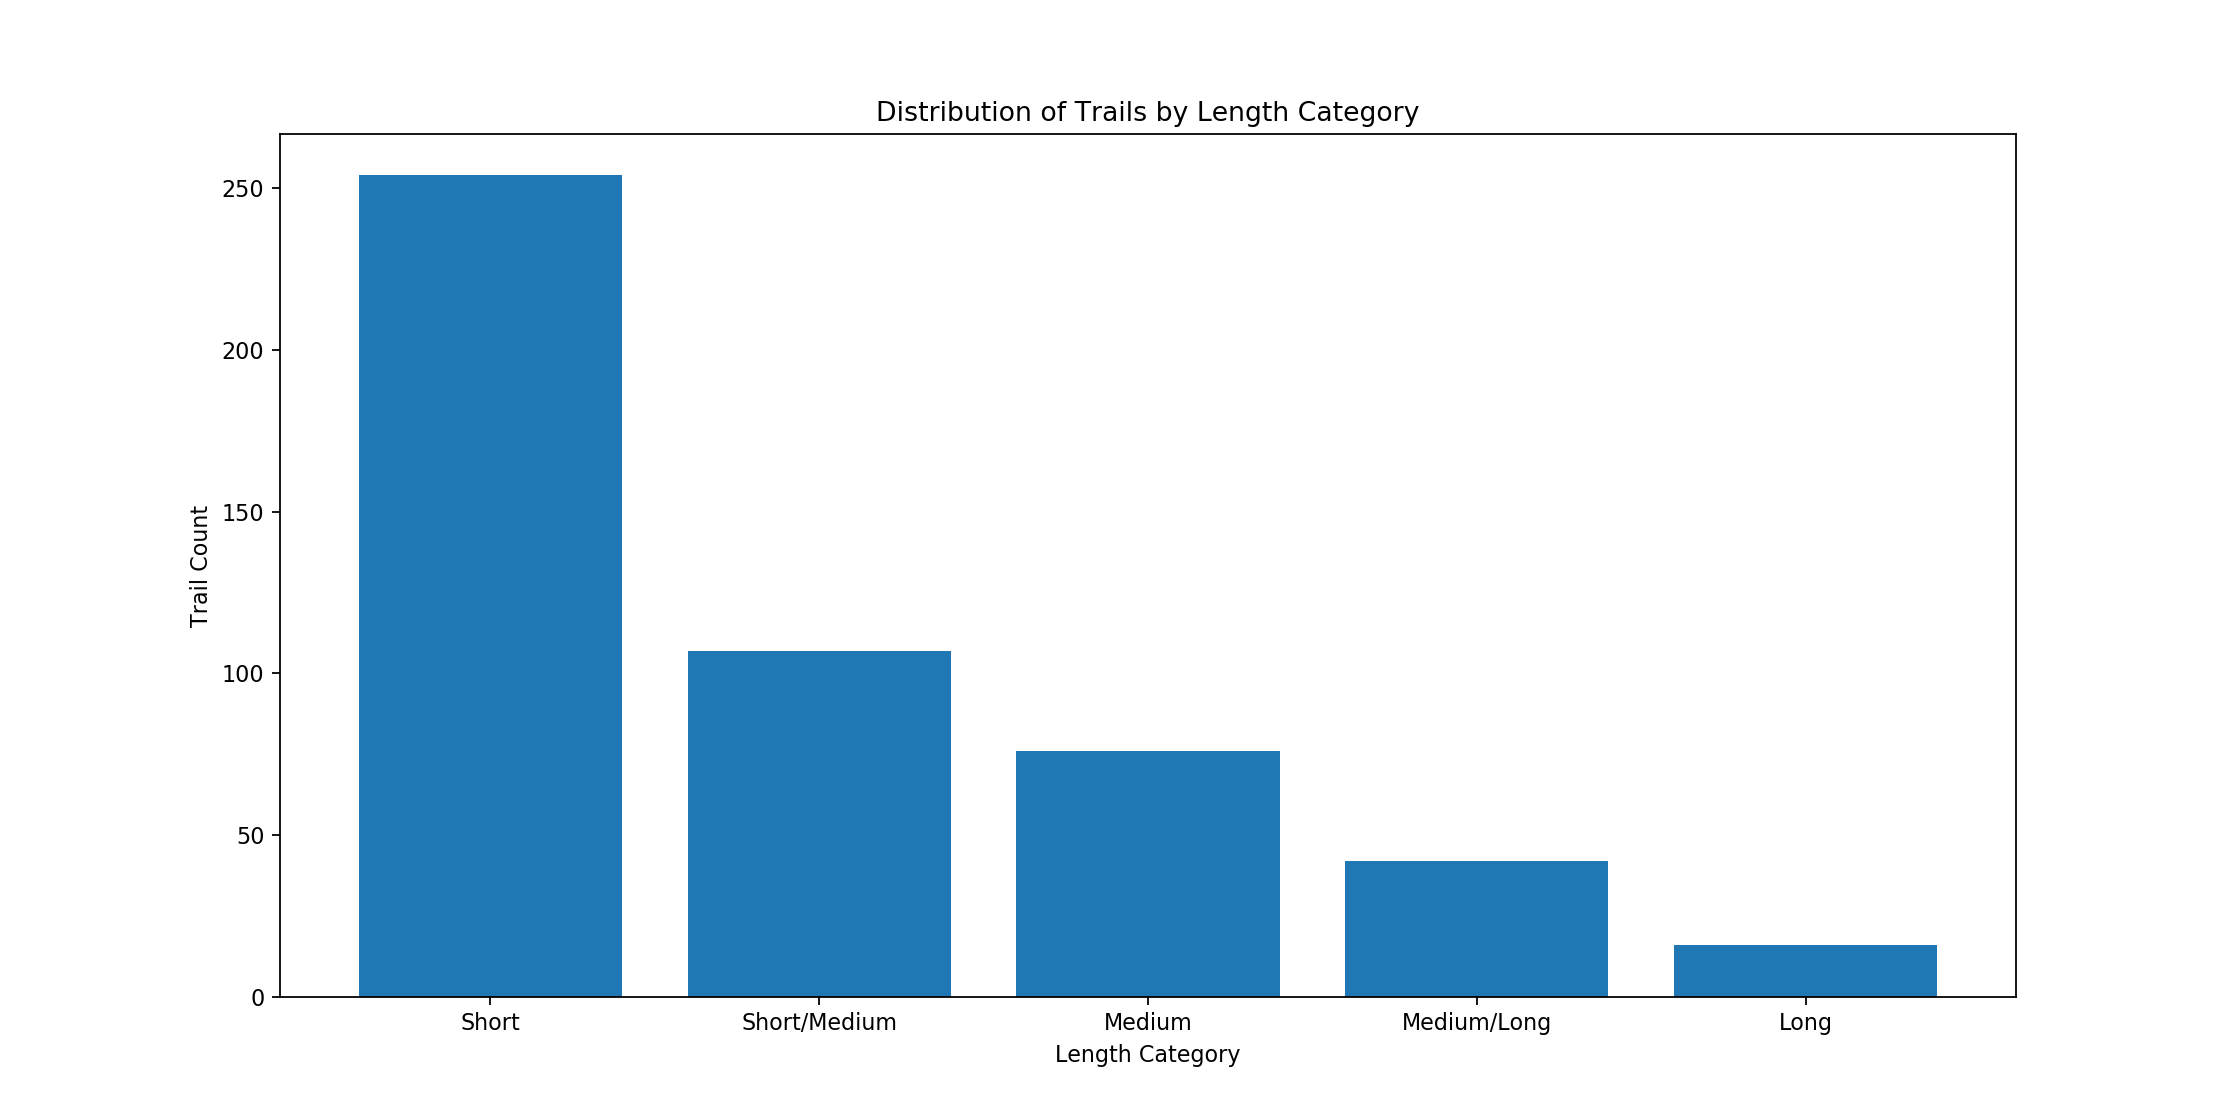

In [29]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')  
plt.bar(categories, Bin_count)
plt.title('Distribution of Trails by Length Category')
plt.xlabel('Length Category')
plt.ylabel('Trail Count')
plt.show()

>Whoops! Looks like these bins are a bit lop-sided.
>
>Want more equally distributed bins. Maybe try quantile based approach to decide bin values.

In [30]:
length_bins_take2 = trails_dropped[['name', 'stars','starVotes','popular_vote', 'location','length','longitude','latitude']]
length_bins_take2 = length_bins_take2.sort_values(by=['length'])
length_bins_take2.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
467,Parking Connector,3.0,1,3.0,"Alta Sierra, California",0.0,-121.0359,39.1496
316,Poppy Connector,0.0,0,0.0,"North Auburn, California",0.0,-121.1639,38.9593
285,Connector Trail,0.0,0,0.0,"Loomis, California",0.0,-121.2094,38.8494
429,Connector Trail,0.0,0,0.0,"Green Valley, California",0.0,-122.1374,38.2443
310,Hidden Falls Lookout Spur,0.0,0,0.0,"North Auburn, California",0.0,-121.1781,38.9667


> Let's go ahead and remove all the rows with length = 0

In [31]:
length_bins_take2 = length_bins_take2.iloc[5:]
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
255,Connector Trail,0.0,0,0.0,"Carmichael, California",0.1,-121.3086,38.6150
268,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609
290,Old Barn Cutoff Trail,0.0,0,0.0,"Loomis, California",0.1,-121.2057,38.8497
451,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786
466,Connector Road,0.0,0,0.0,"Valley Springs, California",0.1,-120.8145,38.1581
...,...,...,...,...,...,...,...,...
192,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555
205,Bigger Basin Loop,4.0,2,8.0,"Boulder Creek, California",28.1,-122.2229,37.1731
59,Ebbetts Pass to Carson Pass,5.0,1,5.0,"South Lake Tahoe, California",29.0,-119.8116,38.5446
250,Jedediah Smith Memorial Trail,3.5,8,28.0,"Sacramento, California",32.7,-121.5077,38.6009


> Also, there seems to be rows with starVotes = 0
>
> This means that nobody rated the trail! Boo. We don't want that.
>
> Let's see how many trails have zero votes.

In [32]:
length_bins_take2.starVotes.value_counts()

0      119
1      119
2       52
3       39
4       24
6       16
5       15
7       13
8       13
13       8
9        7
11       7
12       7
10       6
16       5
19       3
14       3
15       3
21       3
27       3
22       2
29       2
31       2
55       2
23       2
46       2
24       1
49       1
114      1
70       1
69       1
60       1
56       1
51       1
37       1
48       1
38       1
32       1
28       1
17       1
18       1
20       1
187      1
251      1
Name: starVotes, dtype: int64

> Looks like 119 trails in our dataset have no votes! Let's remove those.

In [33]:
length_bins_take2 = length_bins_take2.sort_values(by=['starVotes'])
length_bins_take2 = length_bins_take2.iloc[119:]
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude
193,Russian Ridge Tour,4.0,1,4.0,"La Honda, California",4.7,-122.1981,37.3082
39,Cache Creek Ford,5.0,1,5.0,"Clearlake, California",13.1,-122.4158,39.0086
405,Middle Bar Trail,3.0,1,3.0,"Jackson, California",2.2,-120.7480,38.2972
470,Manzanita Trail,4.0,1,4.0,"Napa, California",1.7,-122.2373,38.2701
326,Knickerbocker Creek Trail,3.0,1,3.0,"Auburn, California",1.6,-121.0327,38.8744
...,...,...,...,...,...,...,...,...
123,Tomales Point Trail,4.6,69,317.4,"Inverness, California",9.8,-122.9543,38.1891
228,Mirror Lake Loop,3.9,70,273.0,"Yosemite Valley, California",4.7,-119.5603,37.7393
222,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464
235,Half Dome,4.9,187,916.3,"Yosemite Valley, California",14.5,-119.5583,37.7325


>Cool. Now let's try making more equal sized bins for comparison.

In [34]:
length_bins_take2 = length_bins_take2.sort_values(by=['length'])
length_bins_take2['length_bin'] = pd.qcut(x=length_bins_take2['length'], q=5)
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin
455,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3168,38.7818,"(0.099, 1.4]"
451,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0.099, 1.4]"
268,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0.099, 1.4]"
494,Lower Chaparral Trail,3.0,1,3.0,"Clayton, California",0.3,-121.8650,37.9523,"(0.099, 1.4]"
353,Tinker's Cut-Off,3.0,1,3.0,"North Auburn, California",0.3,-121.0408,38.9161,"(0.099, 1.4]"
...,...,...,...,...,...,...,...,...,...
192,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555,"(8.7, 60.6]"
205,Bigger Basin Loop,4.0,2,8.0,"Boulder Creek, California",28.1,-122.2229,37.1731,"(8.7, 60.6]"
59,Ebbetts Pass to Carson Pass,5.0,1,5.0,"South Lake Tahoe, California",29.0,-119.8116,38.5446,"(8.7, 60.6]"
250,Jedediah Smith Memorial Trail,3.5,8,28.0,"Sacramento, California",32.7,-121.5077,38.6009,"(8.7, 60.6]"


> Making labels for bins/categories

In [36]:
length_bins_take2['length_category'] = pd.qcut(x=length_bins_take2['length'], q=5, labels=['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'])
length_bins_take2

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
455,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3168,38.7818,"(0.099, 1.4]",Short
451,Zim Zim Falls Overlook,3.0,1,3.0,"Hidden Valley Lake, California",0.1,-122.3145,38.7786,"(0.099, 1.4]",Short
268,River Walk Extension,3.0,1,3.0,"Thornton, California",0.1,-121.4380,38.2609,"(0.099, 1.4]",Short
494,Lower Chaparral Trail,3.0,1,3.0,"Clayton, California",0.3,-121.8650,37.9523,"(0.099, 1.4]",Short
353,Tinker's Cut-Off,3.0,1,3.0,"North Auburn, California",0.3,-121.0408,38.9161,"(0.099, 1.4]",Short
...,...,...,...,...,...,...,...,...,...,...
192,State Park Trifecta,5.0,1,5.0,"Saratoga, California",28.0,-122.1291,37.2555,"(8.7, 60.6]",Long
205,Bigger Basin Loop,4.0,2,8.0,"Boulder Creek, California",28.1,-122.2229,37.1731,"(8.7, 60.6]",Long
59,Ebbetts Pass to Carson Pass,5.0,1,5.0,"South Lake Tahoe, California",29.0,-119.8116,38.5446,"(8.7, 60.6]",Long
250,Jedediah Smith Memorial Trail,3.5,8,28.0,"Sacramento, California",32.7,-121.5077,38.6009,"(8.7, 60.6]",Long


> Just out of curiosity, what are the value ranges of each bin?

In [37]:
new_bins = length_bins_take2.length_bin.unique()
new_bins

[(0.099, 1.4], (1.4, 3.3], (3.3, 5.5], (5.5, 8.7], (8.7, 60.6]]
Categories (5, interval[float64]): [(0.099, 1.4] < (1.4, 3.3] < (3.3, 5.5] < (5.5, 8.7] < (8.7, 60.6]]

In [38]:
categories = list(length_bins_take2.length_category.unique())
categories

['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long']

In [39]:
Bin_count = pd.DataFrame(length_bins_take2.length_category.value_counts())
Bin_count = Bin_count.rename(columns={"length_category": "trail_count"})
Bin_count

,trail_count
Medium/Long,77
Short,77
Short/Medium,75
Medium,74
Long,73


> Reorganize bin counts based on length of trail.

In [40]:
Bin_count = Bin_count.loc[categories].reset_index()

In [41]:
Bin_count

,index,trail_count
0,Short,77
1,Short/Medium,75
2,Medium,74
3,Medium/Long,77
4,Long,73


> Nice! Bins are definitely more evenly distributed than they were through our arbitrary selection earlier.
>
> Let's make pretty figures to meet project requirements!

Using a colormap to make things more interesting.

In [42]:
viridis = cm.get_cmap('viridis', 5)

<IPython.core.display.Javascript object>


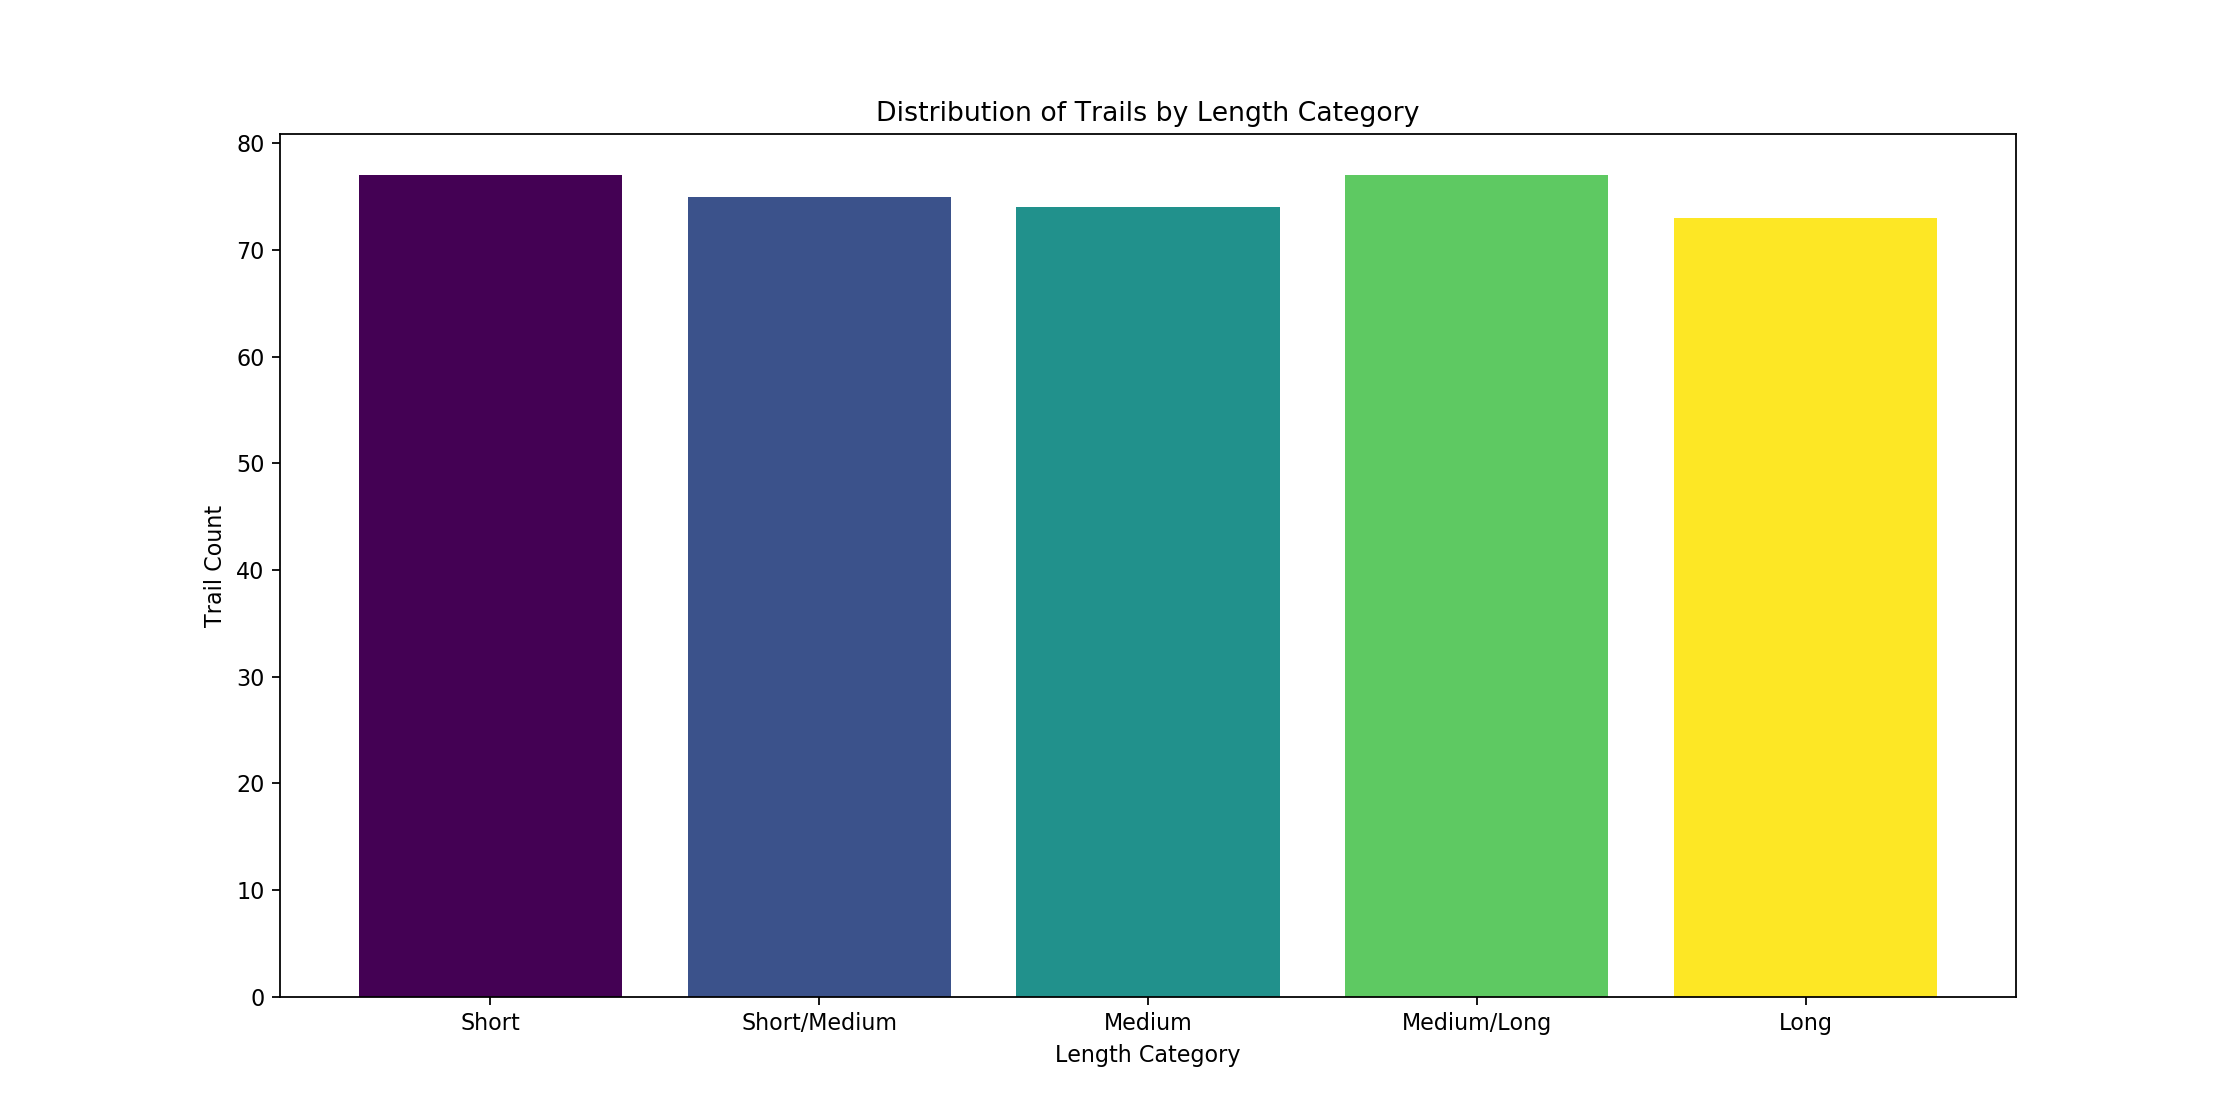

In [43]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')  
plt.bar(Bin_count['index'], Bin_count['trail_count'], color=(viridis.colors[0], viridis.colors[1], viridis.colors[2], viridis.colors[3], viridis.colors[4]))
plt.title('Distribution of Trails by Length Category')
plt.xlabel('Length Category')
plt.ylabel('Trail Count')
plt.show()

In [236]:
plt.savefig('Bar_DistributionBins.png')

> Well, that was fun.
>
> Now let's try to do something useful.

Pulling out grouped values into new frames.

In [44]:
short_bin = length_bins_take2.groupby(['length_category']).get_group('Short')
shortmed_bin = length_bins_take2.groupby(['length_category']).get_group('Short/Medium')
medium_bin = length_bins_take2.groupby(['length_category']).get_group('Medium')
medlong_bin = length_bins_take2.groupby(['length_category']).get_group('Medium/Long')
long_bin = length_bins_take2.groupby(['length_category']).get_group('Long')

<IPython.core.display.Javascript object>


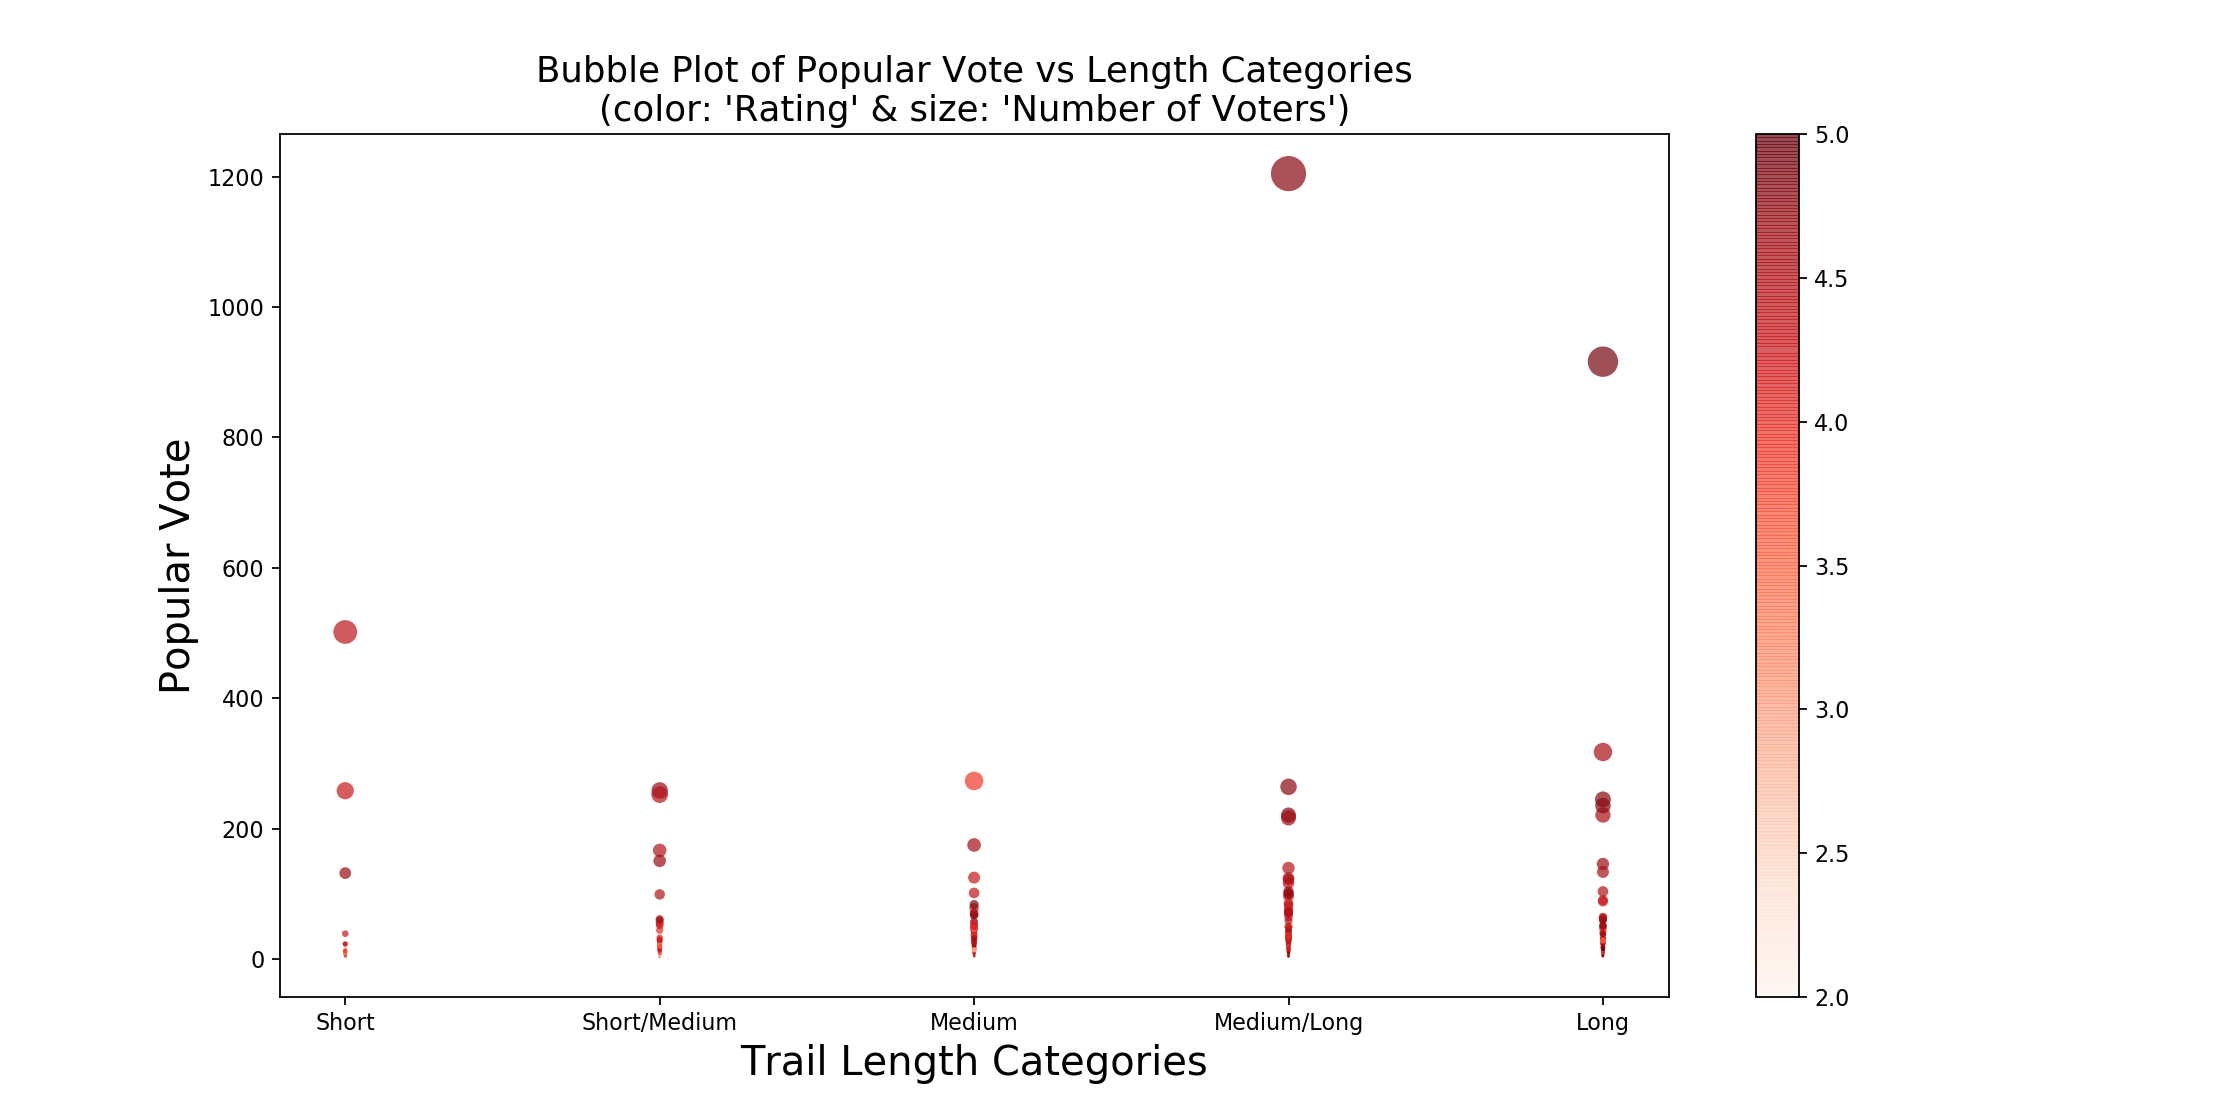

In [45]:
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('length_category', 'popular_vote', data=length_bins_take2, c='stars', s='starVotes', cmap='Reds', alpha=0.7, edgecolors='None', linewidths=.5)
plt.title("Bubble Plot of Popular Vote vs Length Categories\n(color: 'Rating' & size: 'Number of Voters')", fontsize=16)
plt.xlabel('Trail Length Categories', fontsize=18)
plt.ylabel('Popular Vote', fontsize=18)
plt.colorbar()
plt.show()

In [ ]:
plt.savefig('BubblePlot_DistributionBins.png')

> Now let's specifically identify the top 5 trails in each length category.

Top 5 popular trails that are short in length (i.e. less than 1.4 miles long)

In [47]:
short_bin = short_bin.sort_values(by=['popular_vote'], ascending = False)
short_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
222,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short
218,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short
229,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short
223,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short
168,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short


Top 5 popular trails that are short/medium in length (i.e. between 1.4 to 3.3 miles long)

In [48]:
shortmed_bin = shortmed_bin.sort_values(by=['popular_vote'], ascending = False)
shortmed_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
231,Sentinel Dome,4.7,55,258.5,"Yosemite Valley, California",2.1,-119.5867,37.7129,"(1.4, 3.3]",Short/Medium
135,Coastal Trail: Lands End,4.5,56,252.0,"San Francisco, California",2.9,-122.5117,37.7807,"(1.4, 3.3]",Short/Medium
232,Taft Point,4.5,37,166.5,"Yosemite Valley, California",2.3,-119.5864,37.7126,"(1.4, 3.3]",Short/Medium
117,Hillside Loop,4.7,32,150.4,"Tamalpais Valley, California",2.5,-122.5694,37.8913,"(1.4, 3.3]",Short/Medium
55,Horsetail Falls,4.5,22,99.0,"South Lake Tahoe, California",3.3,-120.1237,38.8115,"(1.4, 3.3]",Short/Medium


Top 5 popular trails that are medium in length (i.e. between 3.3 to 5.54 miles long)

In [49]:
medium_bin = medium_bin.sort_values(by=['popular_vote'], ascending = False)
medium_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
228,Mirror Lake Loop,3.9,70,273.0,"Yosemite Valley, California",4.7,-119.5603,37.7393,"(3.3, 5.5]",Medium
191,Castle Rock Loop,4.6,38,174.8,"Monte Sereno, California",3.4,-122.0958,37.2307,"(3.3, 5.5]",Medium
5,Stebbins Cold Canyon Loop,4.3,29,124.7,"Winters, California",5.1,-122.0970,38.5119,"(3.3, 5.5]",Medium
118,Panoramic Loop,4.4,23,101.2,"Tamalpais Valley, California",4.5,-122.5694,37.8913,"(3.3, 5.5]",Medium
233,Taft Point to Sentinel Dome Loop,4.9,17,83.3,"Yosemite Valley, California",5.5,-119.5864,37.7127,"(3.3, 5.5]",Medium


Top 5 popular trails that are medium/long in length (i.e. between 5.54 to 8.7 miles long)

In [50]:
medlong_bin = medlong_bin.sort_values(by=['popular_vote'], ascending = False)
medlong_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
234,Vernal and Nevada Falls Loop,4.8,251,1204.8,"Yosemite Valley, California",6.2,-119.5583,37.7326,"(5.5, 8.7]",Medium/Long
131,Steep Ravine - Matt Davis Loop,4.8,55,264.0,"Bolinas, California",7.1,-122.6359,37.8966,"(5.5, 8.7]",Medium/Long
221,Upper Yosemite Falls and Yosemite Point Hike,4.8,46,220.8,"Yosemite Valley, California",8.0,-119.6022,37.7424,"(5.5, 8.7]",Medium/Long
144,Palomarin to Alamere Falls Out and Back,4.7,46,216.2,"Bolinas, California",8.3,-122.7462,37.9339,"(5.5, 8.7]",Medium/Long
63,Redwood Regional Loop,4.5,31,139.5,"Piedmont, California",7.3,-122.1769,37.8036,"(5.5, 8.7]",Medium/Long


Top 5 popular trails that are long in length (i.e. more than 8.7 miles long)

In [51]:
long_bin = long_bin.sort_values(by=['popular_vote'], ascending = False)
long_bin.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
235,Half Dome,4.9,187,916.3,"Yosemite Valley, California",14.5,-119.5583,37.7325,"(8.7, 60.6]",Long
123,Tomales Point Trail,4.6,69,317.4,"Inverness, California",9.8,-122.9543,38.1891,"(8.7, 60.6]",Long
88,Mount Tallac,4.8,51,244.8,"South Lake Tahoe, California",9.9,-120.0682,38.9214,"(8.7, 60.6]",Long
226,Clouds Rest Viewpoint Trail,4.8,49,235.2,"Yosemite Valley, California",12.4,-119.4700,37.8257,"(8.7, 60.6]",Long
207,Berry Creek Falls Loop,4.6,48,220.8,"Boulder Creek, California",9.7,-122.2224,37.1721,"(8.7, 60.6]",Long


> Store those results as new dataframes

In [52]:
top_short = pd.DataFrame(short_bin.head())
top_shortMed = pd.DataFrame(shortmed_bin.head())
top_med = pd.DataFrame(medium_bin.head())
top_medLong = pd.DataFrame(medlong_bin.head())
top_long = pd.DataFrame(long_bin.head())

> Combine results into a single summary dataframe.

In [53]:
combined_result = top_short.append([top_shortMed, top_med, top_medLong, top_long])
combined_result = combined_result.reset_index().drop(['index'], axis=1)
combined_result

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category
0,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short
1,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short
2,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short
3,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short
4,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short
5,Sentinel Dome,4.7,55,258.5,"Yosemite Valley, California",2.1,-119.5867,37.7129,"(1.4, 3.3]",Short/Medium
6,Coastal Trail: Lands End,4.5,56,252.0,"San Francisco, California",2.9,-122.5117,37.7807,"(1.4, 3.3]",Short/Medium
7,Taft Point,4.5,37,166.5,"Yosemite Valley, California",2.3,-119.5864,37.7126,"(1.4, 3.3]",Short/Medium
8,Hillside Loop,4.7,32,150.4,"Tamalpais Valley, California",2.5,-122.5694,37.8913,"(1.4, 3.3]",Short/Medium
9,Horsetail Falls,4.5,22,99.0,"South Lake Tahoe, California",3.3,-120.1237,38.8115,"(1.4, 3.3]",Short/Medium


> Since a map would be pretty cool, let's make a new column for marker colors based on length categories.

In [54]:
combined_result['marker_color']=combined_result['length_category']
combined_result['marker_color']= combined_result['marker_color'].replace(['Short', 'Short/Medium', 'Medium', 'Medium/Long', 'Long'], ['blue', 'green', 'orange', 'red', 'purple'])
combined_result.head()

,name,stars,starVotes,popular_vote,location,length,longitude,latitude,length_bin,length_category,marker_color
0,Lower Yosemite Fall Trail,4.4,114,501.6,"Yosemite Valley, California",1.0,-119.5962,37.7464,"(0.099, 1.4]",Short,blue
1,Bridalveil Falls Trail,4.3,60,258.0,"Yosemite Valley, California",0.4,-119.6509,37.7168,"(0.099, 1.4]",Short,blue
2,Glacier Point,4.7,28,131.6,"Yosemite Valley, California",0.5,-119.5744,37.7276,"(0.099, 1.4]",Short,blue
3,Cook's Meadow Loop,4.3,9,38.7,"Yosemite Valley, California",1.2,-119.5875,37.7484,"(0.099, 1.4]",Short,blue
4,Waterfall Loop Nature Trail,4.6,5,23.0,"Day Valley, California",1.0,-121.7953,37.0840,"(0.099, 1.4]",Short,blue


Save results of analysis to csv file...

In [55]:
combined_result.to_csv('top_trail_length.csv')

> Make an empty map using folium because it is interactive and awesome.

In [56]:
m = folium.Map(location=[38.1341,-121.2722], tiles="cartodbpositron", zoom_start=8.2)

> For loop to add markers to the map one by one

In [57]:
for i,row in combined_result.iterrows():
   folium.Marker(
      location=[row['latitude'], row['longitude']],
      icon=folium.Icon(color=row['marker_color']),
      popup=row['name'],
      tooltip=f'Trail Length Category: {row["length_category"]}'
   ).add_to(m)

> Let's see what it looks like!

In [58]:
m

> Save the map as an html file so it stays interactive.

In [59]:
m.save('mymap.html')